In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta

In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [4]:
data = pd.DataFrame(raw['EUR='])

In [5]:
data.rename(columns={'EUR=':'price'},inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [7]:
data['SMA1'] = data['price'].rolling(42).mean()

In [8]:
data['SMA2'] = data['price'].rolling(252).mean()

In [9]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [10]:
%matplotlib inline
from pylab import mpl,plt
plt.style.use('seaborn-v0_8')
plt.style.use('ggplot')
plt.style.use('classic')
plt.style.use('bmh')

<Axes: title={'center': 'EUR/USD|42 & 252 days SMAs'}, xlabel='Date'>

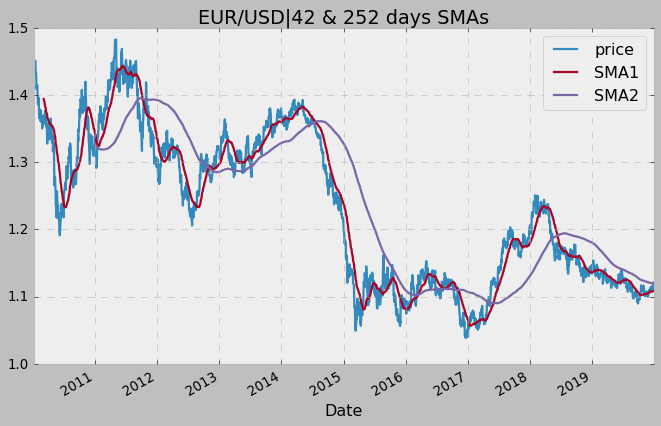

In [11]:
data.plot(title="EUR/USD|42 & 252 days SMAs",figsize=(10,6))

In [12]:
data['position'] = np.where(data['SMA1'] >data['SMA2'],1,-1)

In [13]:
data.dropna(inplace=True)

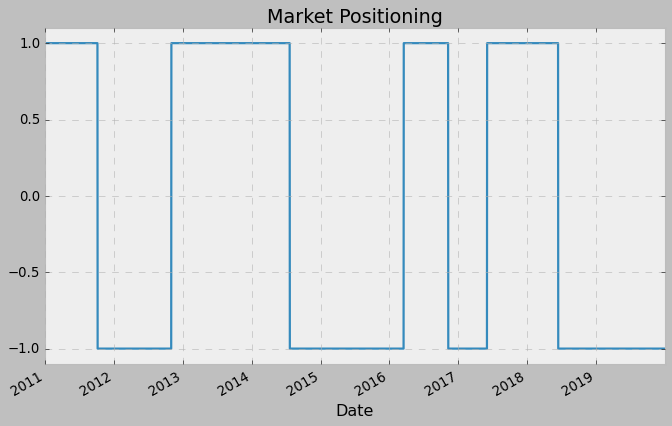

In [14]:
data['position'].plot(ylim=[-1.1,1.1],title="Market Positioning",figsize=(10,6));

In [15]:
data['returns'] = np.log(data['price']/data['price'].shift(1))

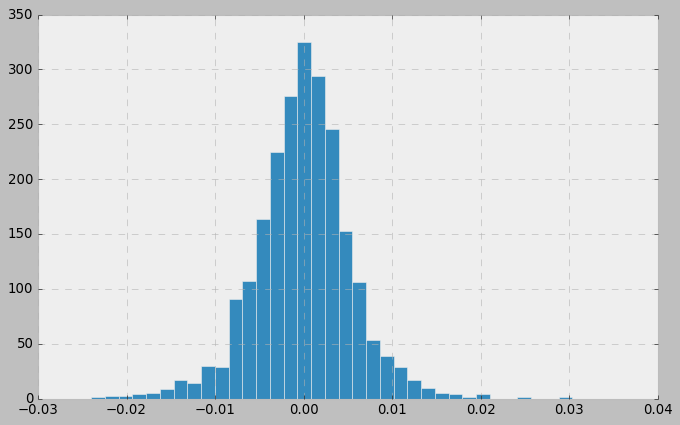

In [16]:
data['returns'].hist(bins=35,figsize=(10,6));

In [17]:
data['strategy'] = data['position'].shift(1)*data['returns']

In [18]:
data[['returns','strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [19]:
data[['returns','strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

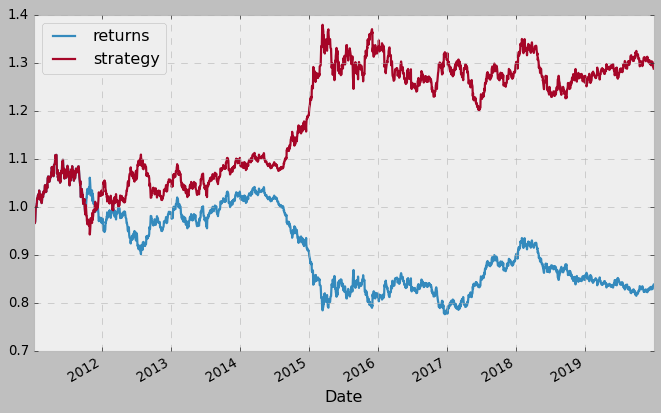

In [20]:
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6));

In [21]:
data[['returns','strategy']].mean()*252

returns    -0.019671
strategy    0.028174
dtype: float64

In [22]:
np.exp(data[['returns','strategy']].mean()*252)-1

returns    -0.019479
strategy    0.028575
dtype: float64

In [23]:
data[['returns','strategy']].std()*252**0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [24]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [25]:
data['cummax'] = data['cumret'].cummax()

<Axes: xlabel='Date'>

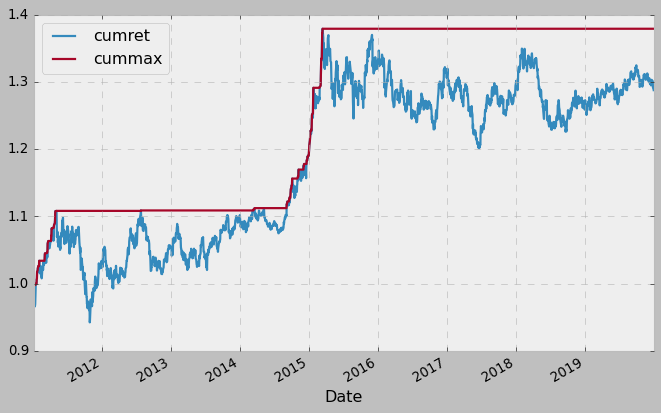

In [26]:
data[['cumret','cummax']].dropna().plot(figsize=(10,6))

In [27]:
drawdown = data['cummax'] - data['cumret']

In [28]:
drawdown.max()

0.17779367070195895

In [29]:
temp = drawdown[drawdown == 0]

In [30]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())

In [31]:
periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=10)], dtype=object)

In [32]:
periods.max()

datetime.timedelta(days=596)